In [ ]:
#https://raw.githubusercontent.com/salemprakash/EDA/main/Data/supermarket_sales.csv

#GitHub Link : https://github.com/Abhhub/EDA-22BCE3914


# **1: Dataset Loading and Exploration + Data Handling/Cleaning**


In [3]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [80]:
# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/salemprakash/EDA/main/Data/supermarket_sales.csv')


In [81]:
#exploring the dataset

print(df.columns) #columns of dataset

df.head() #first few rows of dataset



Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01/05/19,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03/08/19,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03/03/19,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02/08/19,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [82]:
# Dimensions and summary of the Dataset
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")
df.info()
# Statistical summary
df.describe()

The dataset contains 1000 rows and 17 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   998 non-null    object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  999 non-null    object 
 13  cogs                     1000 no

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,9.990000e+02,1000.000000,999.000000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.973373
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131501e-14,11.708825,1.719309
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.000000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.500000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.000000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.500000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.000000


In [83]:
#Handling dataset by checking for missing values and filling the missing values with median and mode

# Checking for missing values before data handling
print(df.isnull().sum())


Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     2
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    1
cogs                       0
gross margin percentage    1
gross income               0
Rating                     1
dtype: int64


In [84]:
#Separating numeric and non numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
non_numeric_cols = df.select_dtypes(exclude=['float64', 'int64']).columns

# Filling missing values for numeric columns with the median
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Filling missing values for non-numeric columns with the mode (most frequent value)
for col in non_numeric_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

#Checking for any remaining missing values after data handling
print(df.isnull().sum())

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


<ipython-input-84-68b28d0d551c>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [85]:
#checking for unmatched data in customer type rows
print(df['Customer type'].unique())
print(df['Customer type'].value_counts())

['Member' 'Normal' '?' '>']
Customer type
Member    501
Normal    497
?           1
>           1
Name: count, dtype: int64


In [86]:
#removing the rows containing '?' and '>' from the customer type column
df = df[df['Customer type'].isin(['Member', 'Normal'])]

#checking the customer type column again
print(df['Customer type'].unique())
print(df['Customer type'].value_counts())

# Remove rows where Gender is '?'
df = df[df['Gender'] != '?']

# Reset index after dropping
df.reset_index(drop=True, inplace=True)

# Verify that '?' values are removed
print(df['Gender'].unique())


['Member' 'Normal']
Customer type
Member    501
Normal    497
Name: count, dtype: int64
['Female' 'Male']


In [87]:
# Removing duplicates
# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")
# Remove duplicates
df = df.drop_duplicates()
print(f"Shape of dataset without duplicates: {df.shape}")

Number of duplicate rows: 0
Shape of dataset without duplicates: (997, 17)


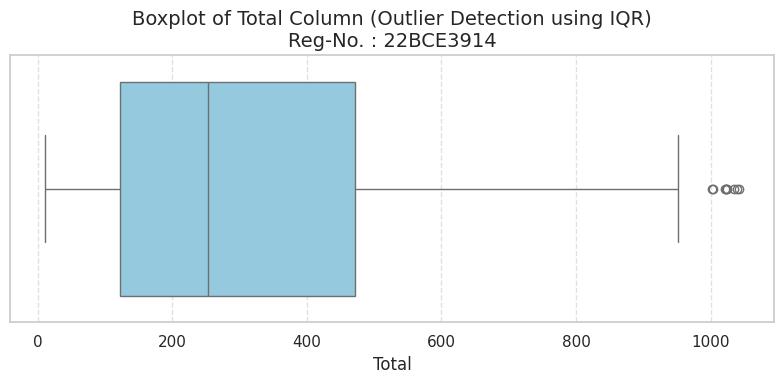

In [88]:
#visualizing Boxplot to detect outliers:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Total'], color='skyblue')
plt.title('Boxplot of Total Column (Outlier Detection using IQR)\nReg-No. : 22BCE3914', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()




In [89]:
#Removing outliers using IQR
# calculate Q1, Q3, and IQR for the 'Total' column
Q1 = df['Total'].quantile(0.25)
Q3 = df['Total'].quantile(0.75)
IQR = Q3 - Q1

# lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR (Q3 - Q1): {IQR}")
print(f"Outlier threshold -> lower than {lower_bound} or higher than {upper_bound}")

# filter out the outliers with the help of bounds
df_filtered = df[(df['Total'] >= lower_bound) & (df['Total'] <= upper_bound)]

print(f"Original shape: {df.shape}")
print(f"Filtered shape (without outliers): {df_filtered.shape}")


Q1 (25th percentile): 122.5245
Q3 (75th percentile): 472.311
IQR (Q3 - Q1): 349.7865
Outlier threshold -> lower than -402.15525 or higher than 996.9907499999999
Original shape: (997, 17)
Filtered shape (without outliers): (988, 17)


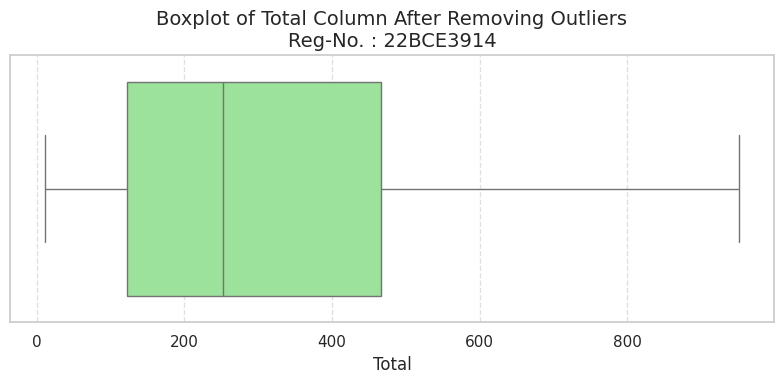

In [90]:
#visualizing boxplot after filtering outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_filtered['Total'], color='lightgreen')
plt.title('Boxplot of Total Column After Removing Outliers\nReg-No. : 22BCE3914', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# ANALYSIS : Univariate

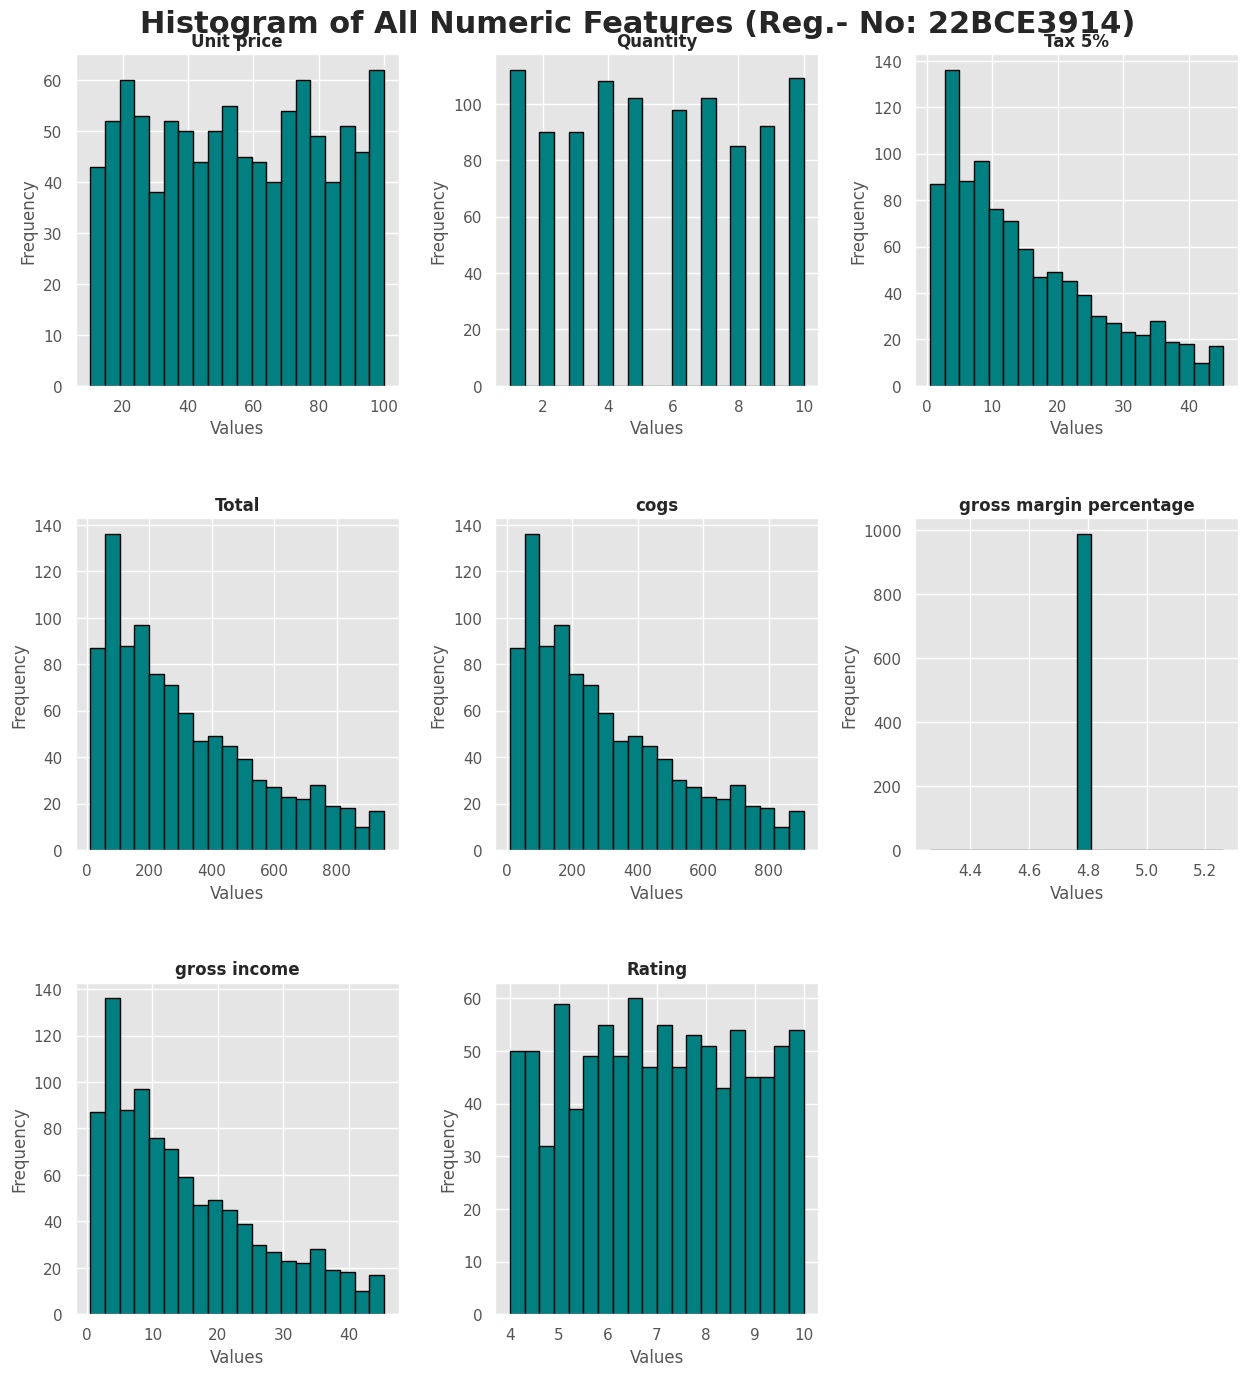

In [91]:
#Histogram for All Numeric Columns

sns.set(style="whitegrid")
plt.style.use('ggplot')

color = '#008080'

# Select numeric columns
df_numeric = df_filtered.select_dtypes(include=['float64', 'int64'])

num_features = len(df_numeric.columns)
num_cols = 3
num_rows = (num_features // num_cols) + (num_features % num_cols > 0)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for i, column in enumerate(df_numeric.columns):
    ax = axes[i]
    df_numeric[column].plot(kind='hist', ax=ax, bins=20, color=color, edgecolor='black', linewidth=1.0)
    ax.set_title(column, fontsize=12, weight='bold')
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Histogram of All Numeric Features (Reg.- No: 22BCE3914)', fontsize=22, weight='bold')
plt.subplots_adjust(top=0.95, hspace=0.4, wspace=0.3)
plt.show()


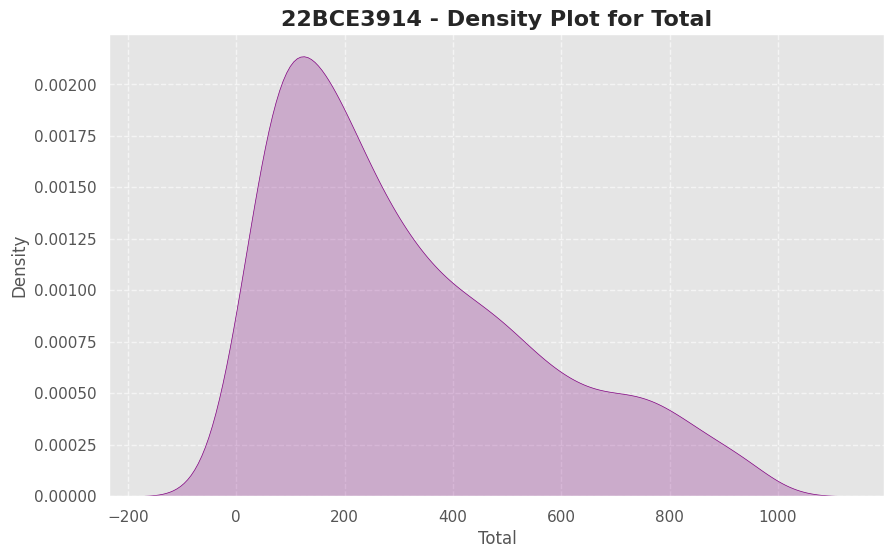

In [92]:
#Density Plot for Total column

plt.figure(figsize=(10, 6))
sns.kdeplot(df_filtered['Total'], color='purple', fill=True)
plt.title("22BCE3914 - Density Plot for Total", fontsize=16, weight='bold')
plt.xlabel("Total")
plt.ylabel("Density")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


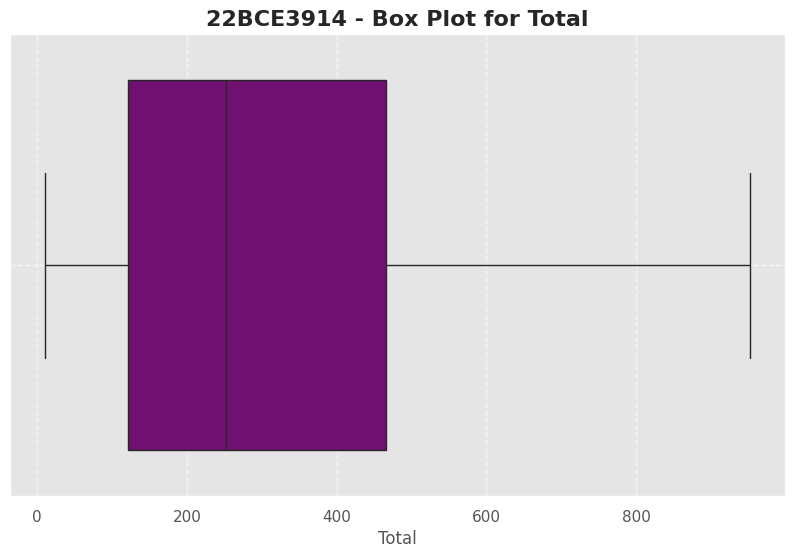

In [93]:
#Box Plot for Total column

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_filtered['Total'], color='purple')
plt.title("22BCE3914 - Box Plot for Total", fontsize=16, weight='bold')
plt.xlabel("Total")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


<ipython-input-94-9e0b402c842d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Payment', data=df_filtered, palette=colors)
<ipython-input-94-9e0b402c842d>:6: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.countplot(x='Payment', data=df_filtered, palette=colors)


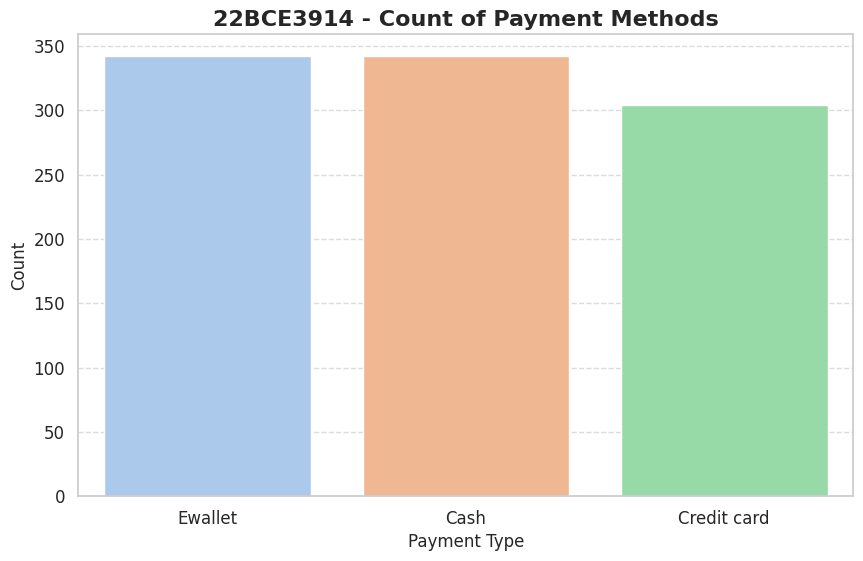

In [94]:
# Bar Plot for Payment Method
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")
colors = sns.color_palette("pastel")

sns.countplot(x='Payment', data=df_filtered, palette=colors)
plt.title("22BCE3914 - Count of Payment Methods", fontsize=16, weight='bold')
plt.xlabel("Payment Type")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


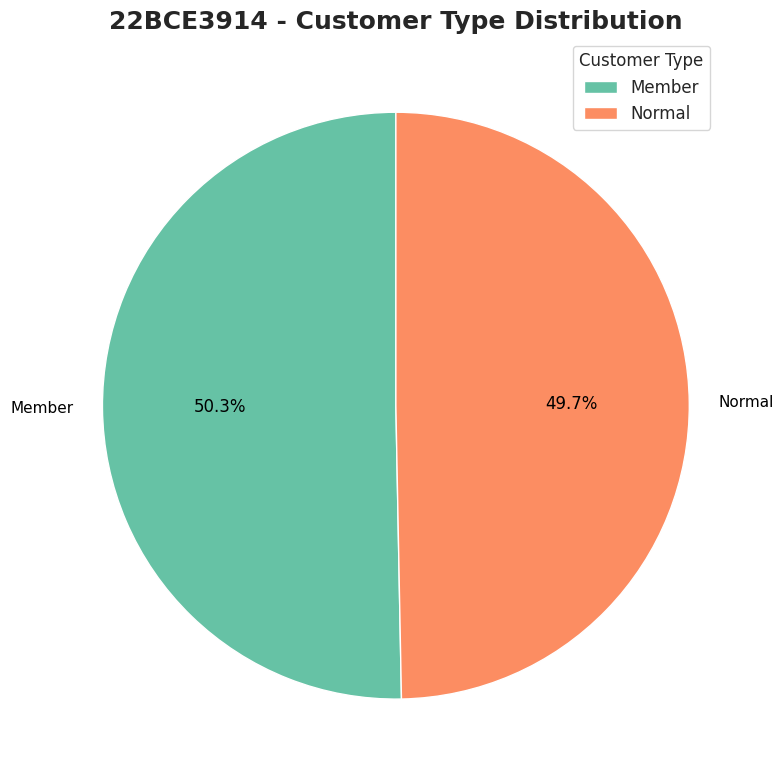

In [95]:
# Pie Plot for Customer type

customer_counts = df_filtered['Customer type'].value_counts()
plt.figure(figsize=(8, 8))
colors = ['#66c2a5', '#fc8d62']

wedges, texts, autotexts = plt.pie(
    customer_counts,
    labels=customer_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    radius=0.8
)

plt.title("22BCE3914 - Customer Type Distribution", fontsize=18, weight='bold')
plt.axis('equal')
for text in texts + autotexts:
    text.set_color('black')
plt.legend(wedges, customer_counts.index, title="Customer Type", loc="upper right", fontsize=12)
plt.tight_layout()
plt.show()


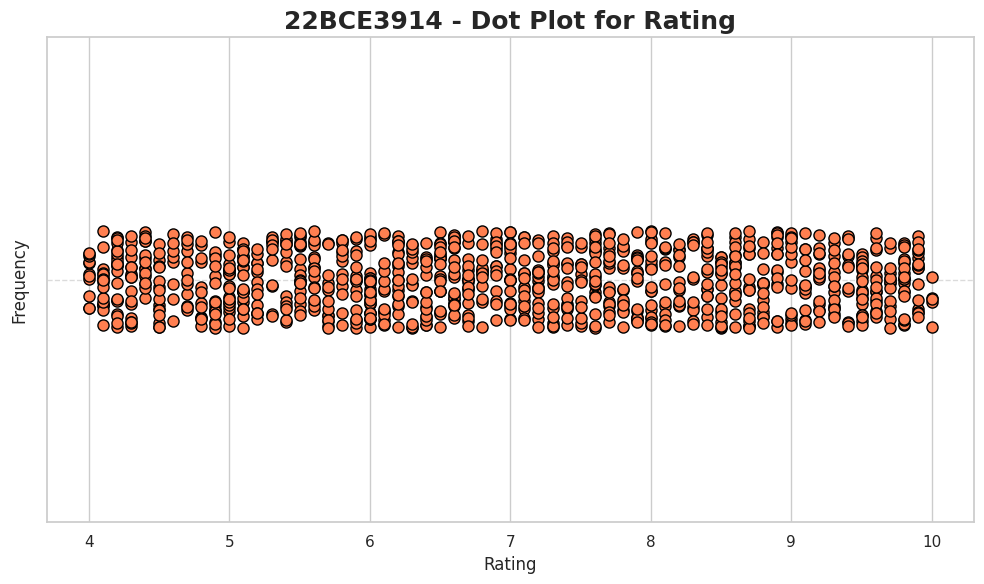

In [96]:
# Dot Plot for Rating

plt.figure(figsize=(10, 6))
sns.stripplot(x='Rating', data=df_filtered, color='#FF7F50', size=8, jitter=True, edgecolor='black', linewidth=1)
plt.title("22BCE3914 - Dot Plot for Rating", fontsize=18, weight='bold')
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


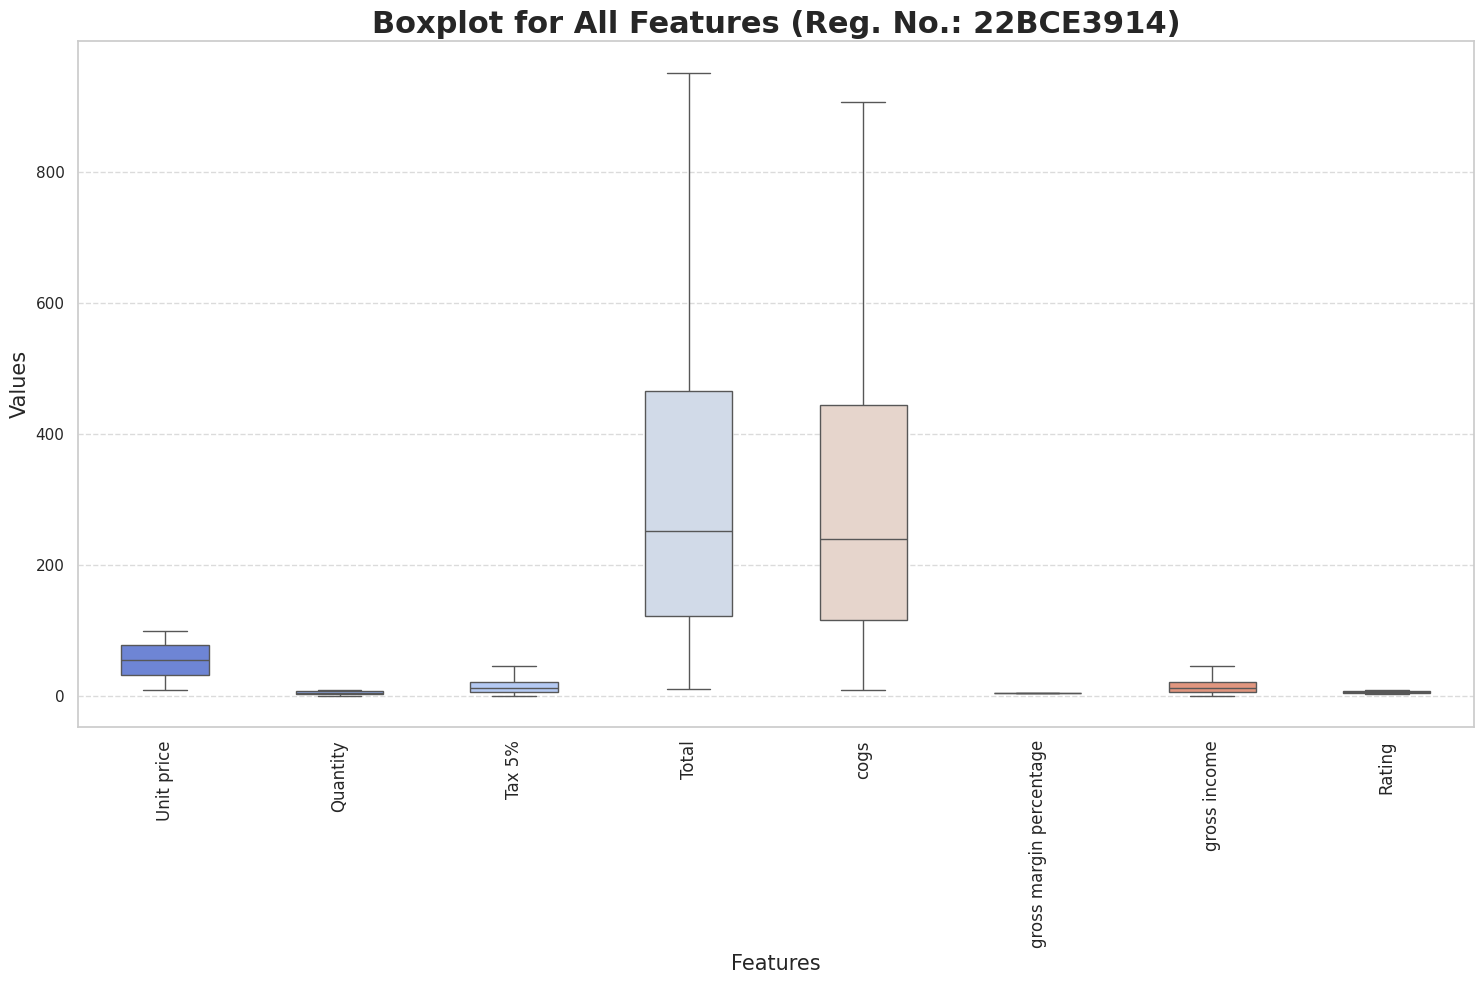

In [97]:
#Boxplot for All Features

plt.figure(figsize=(15, 10))
palette = sns.color_palette("coolwarm", n_colors=len(df_numeric.columns))
sns.boxplot(data=df_numeric, palette=palette, width=0.5)
plt.title('Boxplot for All Features (Reg. No.: 22BCE3914)', fontsize=22, weight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Values', fontsize=15)
plt.xticks(rotation=90, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# **ANALYSIS : Bivariate**

# **Contingency Table (Categorical vs. Binned Numeric)**


In [99]:
# Binning 'Rating' into categories
bins = [0, 4, 6, 8, 10]
labels = ['Poor', 'Average', 'Good', 'Excellent']
df['rating_category'] = pd.cut(df['Rating'], bins=bins, labels=labels, include_lowest=True)

# Contingency Table
contingency_table = pd.crosstab(df['Customer type'], df['rating_category'])
print("Contingency Table:\n", contingency_table)


Contingency Table:
 rating_category  Poor  Average  Good  Excellent
Customer type                                  
Member              7      173   164        156
Normal              4      155   187        151


# **Categorical vs Categorical**

<Figure size 1000x600 with 0 Axes>

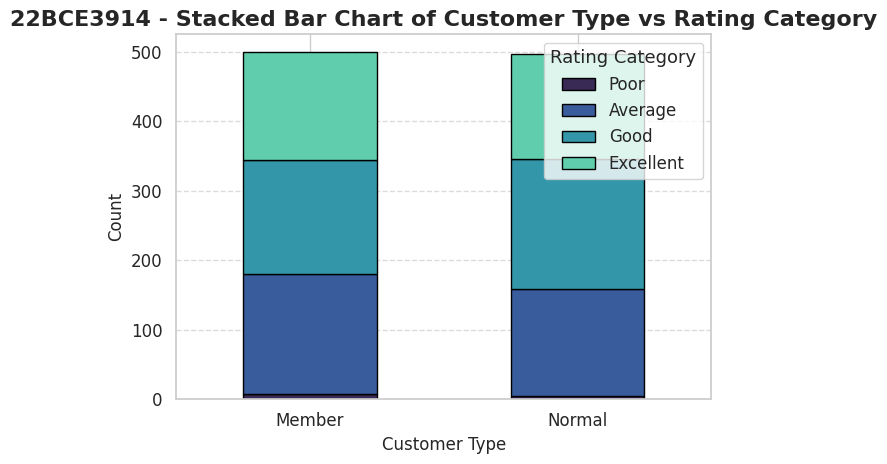

In [100]:
#Stacked Bar Chart: Customer Type vs Rating Category

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

colors = sns.color_palette("mako", n_colors=len(contingency_table.columns))

contingency_table.plot(
    kind='bar',
    stacked=True,
    color=colors,
    edgecolor='black',
    width=0.5
)

plt.title("22BCE3914 - Stacked Bar Chart of Customer Type vs Rating Category", fontsize=16, fontweight='bold')
plt.xlabel("Customer Type")
plt.ylabel("Count")
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Rating Category', title_fontsize='13', fontsize='12', loc='upper right')
plt.tight_layout()
plt.show()


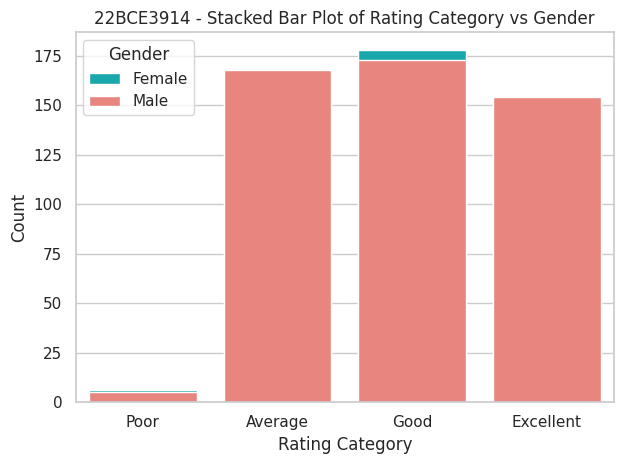

In [101]:
# Stacked Bar Plot : Rating Category vs Gender

sns.set_palette(['#00BFC4', '#F8766D'])
sns.countplot(x='rating_category', hue='Gender', data=df, dodge=False)
plt.title("22BCE3914 - Stacked Bar Plot of Rating Category vs Gender")
plt.xlabel("Rating Category")
plt.ylabel("Count")
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


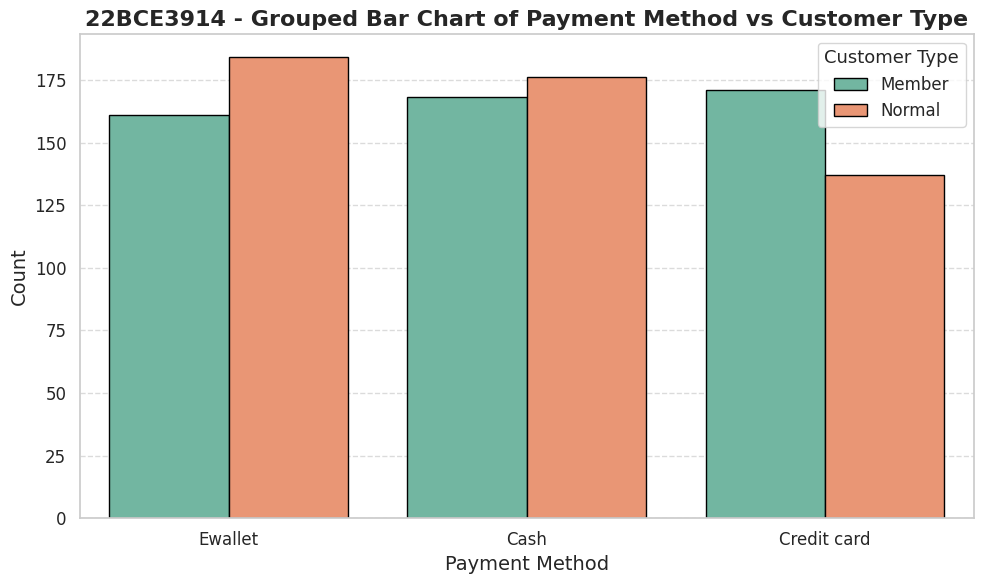

In [102]:
# Grouped Bar Plot: Payment vs Customer Type

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

sns.countplot(data=df, x='Payment', hue='Customer type', palette='Set2', edgecolor='black')

plt.title("22BCE3914 - Grouped Bar Chart of Payment Method vs Customer Type", fontsize=16, fontweight='bold')
plt.xlabel("Payment Method", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Customer Type', title_fontsize='13', fontsize='12', loc='upper right')
plt.tight_layout()
plt.show()


# **Categorical vs Quantitative**


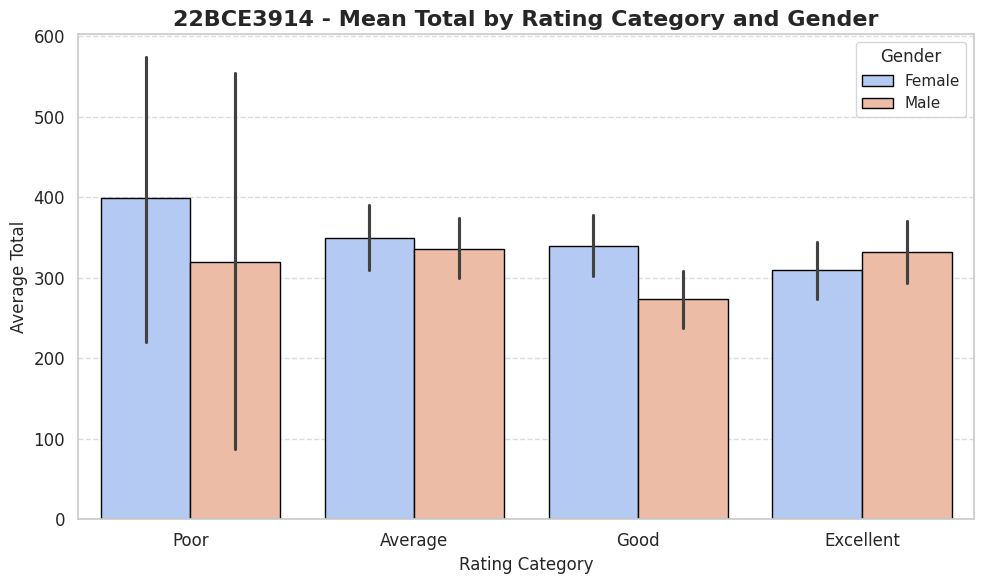

In [103]:
# Bar Chart: Average Total by Rating Category

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

sns.barplot(data=df, x='rating_category', y='Total', hue='Gender', palette='coolwarm', edgecolor='black')

plt.title("22BCE3914 - Mean Total by Rating Category and Gender", fontsize=16, fontweight='bold')
plt.xlabel("Rating Category")
plt.ylabel("Average Total")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Gender', loc='upper right')
plt.tight_layout()
plt.show()



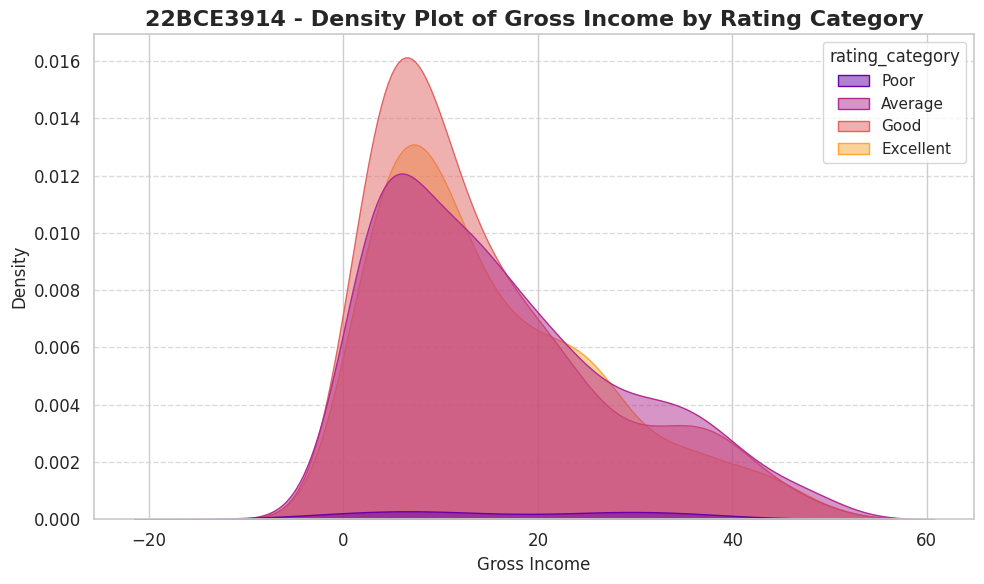

In [104]:
# Density Plot: Gross Income by Rating Category

plt.figure(figsize=(10, 6))
palette = sns.color_palette("plasma", n_colors=len(df['rating_category'].unique()))

sns.kdeplot(data=df, x='gross income', hue='rating_category', fill=True, palette=palette, alpha=0.5)

plt.title("22BCE3914 - Density Plot of Gross Income by Rating Category", fontsize=16, fontweight='bold')
plt.xlabel("Gross Income")
plt.ylabel("Density")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<ipython-input-106-56ba1def7623>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='rating_category', y='Total', palette='pastel')


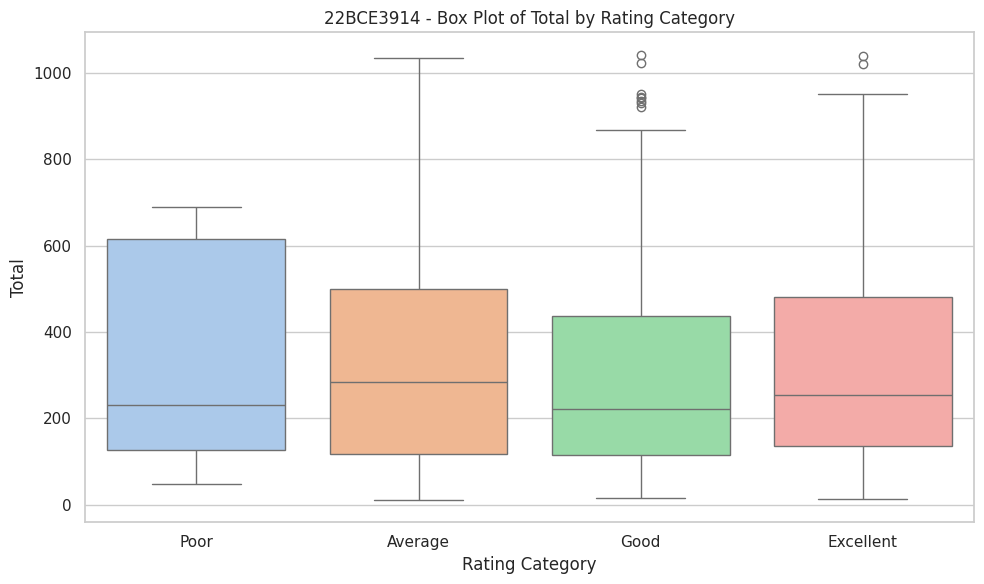

In [106]:
#Box Plot: Total by Rating Category

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='rating_category', y='Total', palette='pastel')
plt.title("22BCE3914 - Box Plot of Total by Rating Category")
plt.xlabel("Rating Category")
plt.ylabel("Total")
plt.tight_layout()
plt.show()



<ipython-input-107-5a0df81df28d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Customer type', y='gross income', palette=palette, edgecolor='black')


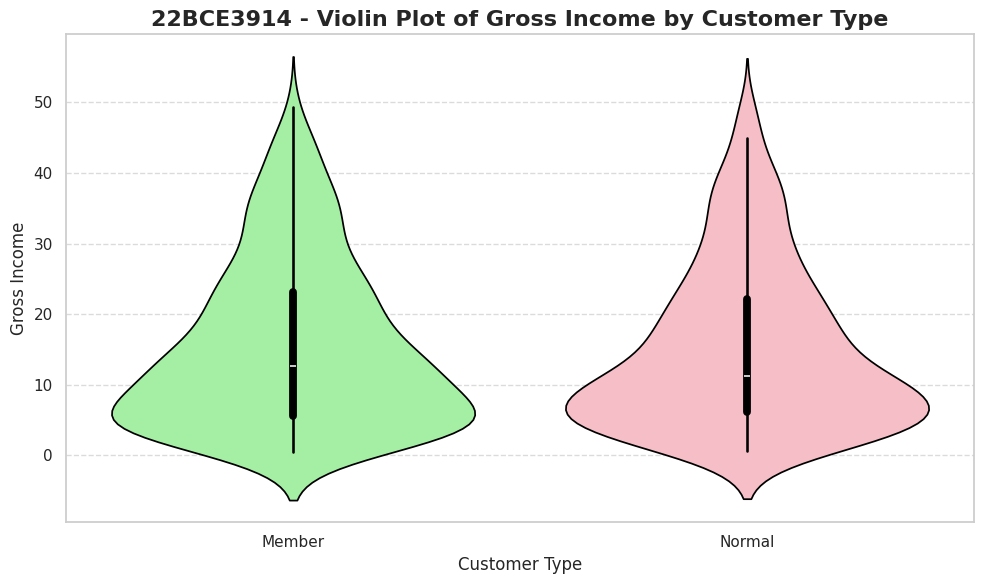

In [107]:
# Violin Plot: Gross Income by Customer Type

plt.figure(figsize=(10, 6))
palette = ['#98FB98', '#FFB6C1']

sns.violinplot(data=df, x='Customer type', y='gross income', palette=palette, edgecolor='black')

plt.title("22BCE3914 - Violin Plot of Gross Income by Customer Type", fontsize=16, fontweight='bold')
plt.xlabel("Customer Type")
plt.ylabel("Gross Income")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<ipython-input-108-bd603e52271c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Gender', y='Rating', palette=['#8A2BE2', '#FF69B4'], inner=None)


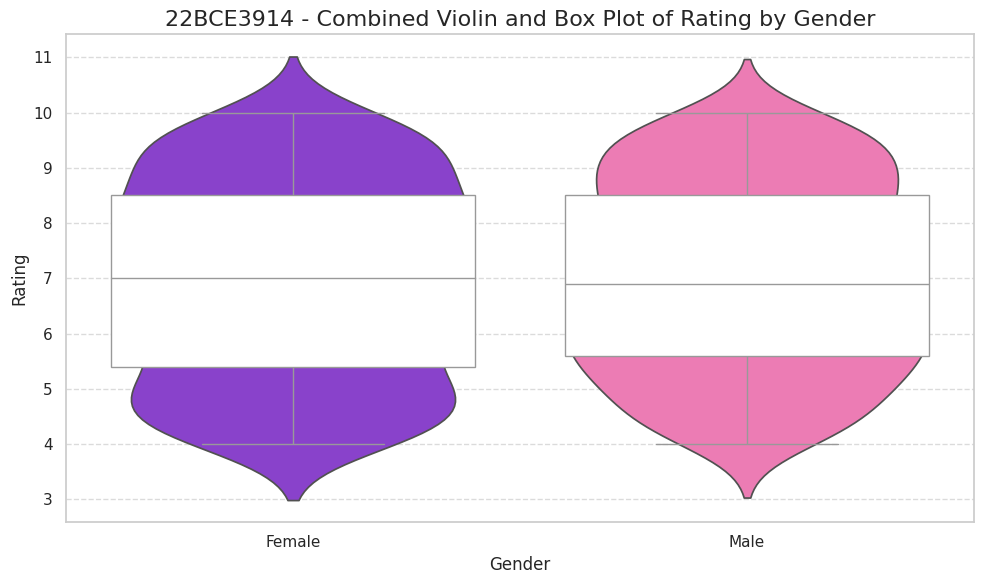

In [108]:
# Combined Violin & Box Plot: Rating by Gender

plt.figure(figsize=(10, 6))

sns.violinplot(data=df, x='Gender', y='Rating', palette=['#8A2BE2', '#FF69B4'], inner=None)
sns.boxplot(data=df, x='Gender', y='Rating', color='white', fliersize=0)

plt.title("22BCE3914 - Combined Violin and Box Plot of Rating by Gender", fontsize=16)
plt.xlabel("Gender")
plt.ylabel("Rating")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



# **Quantitative vs Quantitative**


<ipython-input-109-2f5ec3e95474>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_values = df.groupby('rating_category')['Rating'].mean().reset_index()


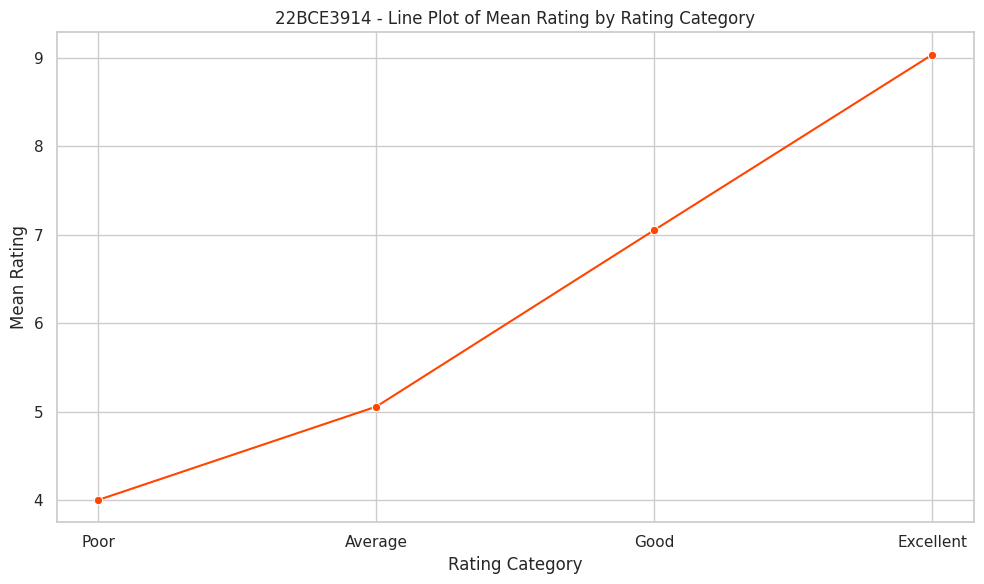

In [109]:
#  Line Plot: Mean Rating by Rating Category
mean_values = df.groupby('rating_category')['Rating'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=mean_values, x='rating_category', y='Rating', marker='o', color='#FF4500')

plt.title("22BCE3914 - Line Plot of Mean Rating by Rating Category")
plt.xlabel("Rating Category")
plt.ylabel("Mean Rating")
plt.tight_layout()
plt.show()



In [112]:
print(df.isnull().sum())  # Shows the count of missing values per column


Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
rating_category            0
dtype: int64


[4.76190476]


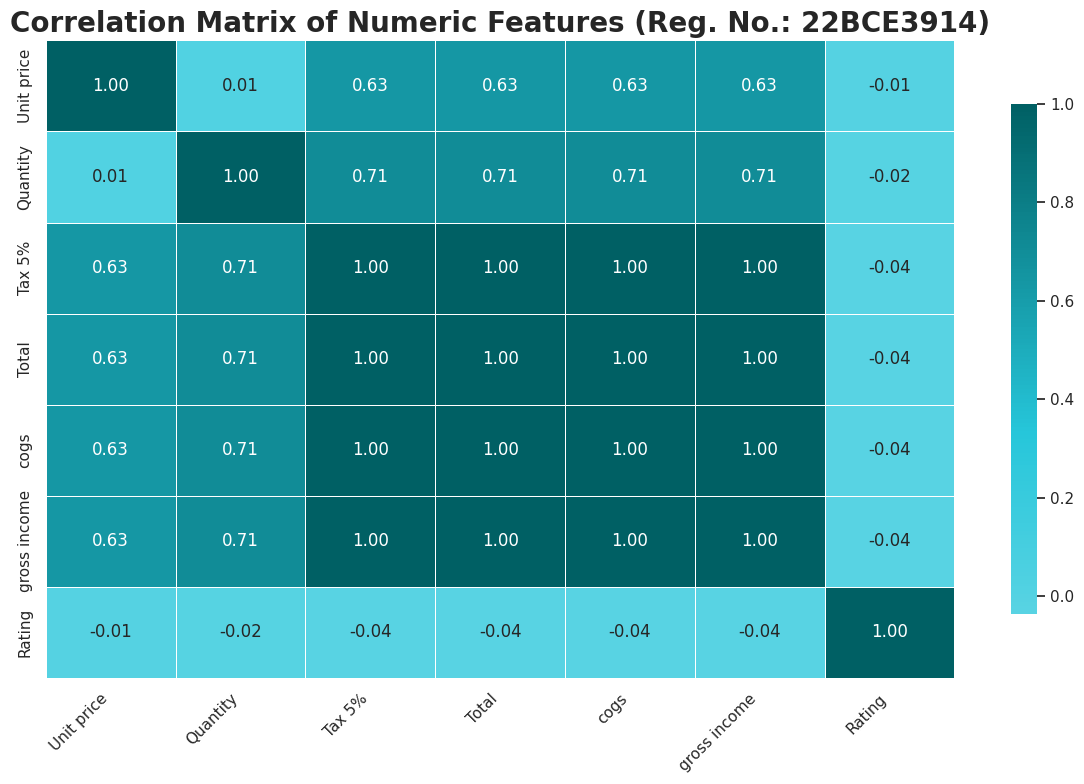

In [128]:
print(df['gross margin percentage'].unique())

#since the  gross margin percentage column has only one unique value that means the column as varience = 0 so dropping the column gross margin percentage for correlation

#Correlation Heatmap

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

df_cleaned = df.drop(columns=['gross margin percentage'])

df_numeric = df_cleaned.select_dtypes(include=['float64', 'int64'])

corr = df_numeric.corr()

colors = ["#e0f7fa", "#80deea", "#26c6da", "#006064"]
cmap = LinearSegmentedColormap.from_list("teal_blue", colors, N=256)

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap=cmap, fmt=".2f", linewidths=0.5, center=0, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numeric Features (Reg. No.: 22BCE3914)', fontsize=20, weight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

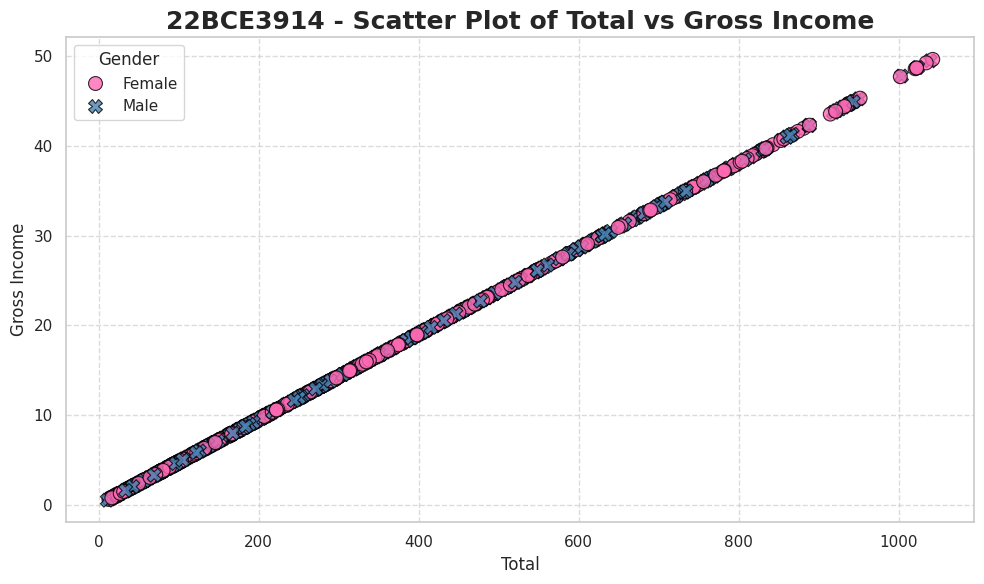

In [133]:
# Scatter Plot: Total vs Gross Income

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Total', y='gross income', hue='Gender', style='Gender',
                palette=['#FF69B4', '#4682B4'], s=100, edgecolor='black', alpha=0.8)

plt.title("22BCE3914 - Scatter Plot of Total vs Gross Income", fontsize=18, weight='bold')
plt.xlabel("Total")
plt.ylabel("Gross Income")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


# **Multivariate Analysis**